### Lens modeling with `lenstronomy`
**Authors:** Mir Sazzat Hossain

#### Importing the required packages

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from lenstronomy.Data.coord_transforms import Coordinates
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Util import mask_util, util
from lenstronomy.Workflow.fitting_sequence import FittingSequence


#### Read the data file

In [2]:
with h5py.File('./DESIJ1205+4110/DESIJ1205+4110_F140W.h5', 'r') as f:
    kwargs_data = {}

    for key in f:
        if key == 'exposure_time':
            kwargs_data[key] = f[key][()]
            continue
        kwargs_data[key] = f[key][()]

# print kwargs_data
for key in kwargs_data:
    print(f'{key}: {kwargs_data[key]}')


background_rms: 0.013529882338632617
dec_at_xy_0: -6.439999999999993
exposure_time: [[491.83884 476.48804 474.46265 ... 411.18542 444.9668  421.98083]
 [303.8621  494.6744  411.66196 ... 418.6309  562.59924 489.38327]
 [403.26965 442.603   419.66995 ... 439.60925 471.8495  454.18597]
 ...
 [375.34952 515.64874 387.16785 ... 479.0426  523.1591  434.5421 ]
 [413.6967  514.0231  469.48065 ... 402.32758 455.61356 456.5683 ]
 [446.8492  500.807   443.8337  ... 459.1944  448.02713 504.2699 ]]
image_data: [[ 0.01782471  0.00153406 -0.00369    ...  0.02928915  0.00779493
   0.01772262]
 [-0.00493755 -0.0280599  -0.01998502 ...  0.01026938 -0.01949841
   0.01028264]
 [-0.02581293 -0.02527415 -0.01339567 ...  0.03498907  0.02121747
  -0.0160352 ]
 ...
 [-0.00601441  0.00527194 -0.01063343 ... -0.01345688 -0.02050141
  -0.01655289]
 [-0.01265608 -0.00728262 -0.01940736 ... -0.02274422 -0.02119467
   0.00721132]
 [-0.01204946 -0.02231948 -0.01162757 ...  0.00166896  0.00150102
   0.00346738]]
ra_a

#### Load PSF data


In [3]:
with h5py.File('./DESIJ1205+4110/psf_F140W.h5', 'r') as f:
    kwargs_psf = {}

    for key in f:
        kwargs_psf[key] = f[key][()]

kwargs_psf['psf_type'] = 'PIXEL'
print(kwargs_psf)


{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
        3.2385867e-06, 4.4331632e-06],
       [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
        6.6143798e-06, 4.1430776e-06],
       [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
        5.1404800e-06, 1.7530243e-06],
       ...,
       [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
        5.3933368e-06, 1.6360833e-06],
       [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
        8.7221979e-06, 3.7005334e-06],
       [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
        3.2246478e-06, 5.1252514e-06]], dtype=float32), 'psf_type': 'PIXEL'}


#### Get the image data from `kwargs_data` and plot it

/tmp/ipykernel_772449/1049868308.py:3: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')


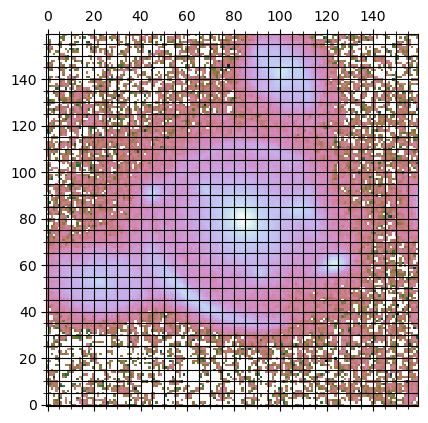

In [4]:
image_data = kwargs_data['image_data']

plt.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')
plt.grid(which='both', color='black')
plt.minorticks_on()
plt.grid(which='minor', color='black')
plt.show()


#### Make mask and plot it

[[ 6.44  6.36  6.28 ... -6.12 -6.2  -6.28]
 [ 6.44  6.36  6.28 ... -6.12 -6.2  -6.28]
 [ 6.44  6.36  6.28 ... -6.12 -6.2  -6.28]
 ...
 [ 6.44  6.36  6.28 ... -6.12 -6.2  -6.28]
 [ 6.44  6.36  6.28 ... -6.12 -6.2  -6.28]
 [ 6.44  6.36  6.28 ... -6.12 -6.2  -6.28]] [[-6.44 -6.44 -6.44 ... -6.44 -6.44 -6.44]
 [-6.36 -6.36 -6.36 ... -6.36 -6.36 -6.36]
 [-6.28 -6.28 -6.28 ... -6.28 -6.28 -6.28]
 ...
 [ 6.12  6.12  6.12 ...  6.12  6.12  6.12]
 [ 6.2   6.2   6.2  ...  6.2   6.2   6.2 ]
 [ 6.28  6.28  6.28 ...  6.28  6.28  6.28]]


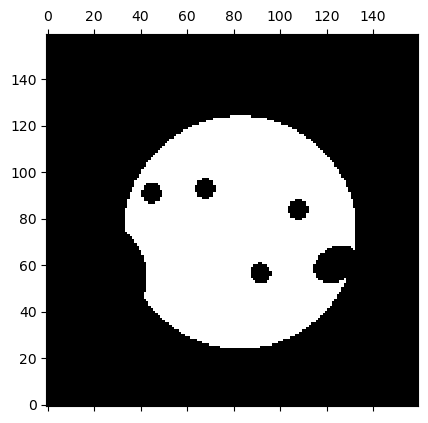

/tmp/ipykernel_772449/3924068423.py:57: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(masked_image_data), origin='lower', cmap='cubehelix')
/tmp/ipykernel_772449/3924068423.py:57: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(masked_image_data), origin='lower', cmap='cubehelix')


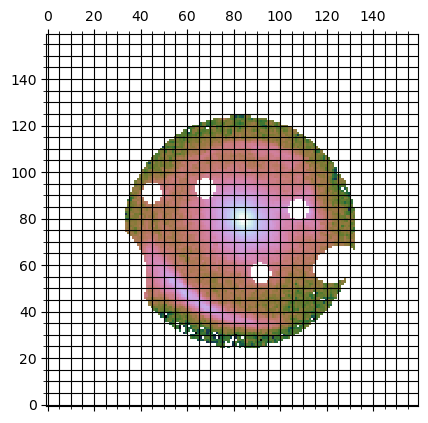

In [5]:
ra_at_xy_0 = kwargs_data['ra_at_xy_0']
dec_at_xy_0 = kwargs_data['dec_at_xy_0']
transform_pix2angle = kwargs_data['transform_pix2angle']

coords = Coordinates(transform_pix2angle, ra_at_xy_0, dec_at_xy_0)
num_pix = len(kwargs_data['image_data'])

x_coords, y_coords = coords.coordinate_grid(num_pix, num_pix)

print(x_coords, y_coords)

r = 4  # arcseconds
lens_center_ra = 0
lens_center_dec = 0

mask_outer = mask_util.mask_center_2d(
    lens_center_ra - 0.2,
    lens_center_dec - 0.5,
    r,
    util.image2array(x_coords),
    util.image2array(y_coords)
)

mask_params = [
    [-3.5, -1.6, 0.8, 0.6, -np.pi/180 *30], # x, y, q, phi, theta
    [2.84, 0.85, 0.35, 0.35, 0],
    [1., 1., 0.35, 0.35, 0],
    [-0.9, -1.9, 0.35, 0.35, 0],
    [-2.2, 0.28, 0.35, 0.35, 0],
    [5, -2.04, 2, 2, np.pi]
]

mask = 1 - mask_outer

for mask_param in mask_params:
    mask *= 1 -  mask_util.mask_ellipse(
                    util.image2array(x_coords),
                    util.image2array(y_coords),
                    mask_param[0],
                    mask_param[1],
                    mask_param[2],
                    mask_param[3],
                    mask_param[4]
                )

mask[mask >= 1] = 1
mask[mask < 0] = 0

mask = mask.reshape(num_pix, num_pix)

plt.matshow(mask, origin='lower', cmap='cubehelix')
plt.show()

# mask image data
masked_image_data = np.multiply(image_data, mask)

plt.matshow(np.log10(masked_image_data), origin='lower', cmap='cubehelix')
plt.grid(which='both', color='black')
plt.minorticks_on()
plt.grid(which='minor', color='black')
plt.show()
